<a href="https://colab.research.google.com/github/28left/22jupyter/blob/main/activity_22_5_01_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/28left/cyllene.git

  Cloning https://github.com/28left/cyllene.git to /tmp/pip-req-build-ytxfw2s1
  Running command git clone -q https://github.com/28left/cyllene.git /tmp/pip-req-build-ytxfw2s1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for cyllene: filename=cyllene-0.2-cp37-none-any.whl size=27527 sha256=d21451174b843beac45ba734c3fe5e7ce9c26593d878e838a739b5e6ebb450c3
  Stored in directory: /tmp/pip-ephem-wheel-cache-5q12d4bt/wheels/3e/18/73/4a45f074bb2820233eda690ac5f87b9c9f140d5442aa3fde8c
Successfully built cyllene


In [2]:
!pip install "ipython>=7"

     |████████████████████████████████| 788kB 8.7MB/s 
     |████████████████████████████████| 368kB 17.0MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.18 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.22.0 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0


In [1]:
import cyllene
from cyllene import *
import sympy as sp
from sympy import plot


f = expression('x+2')

g = expression('x^2')
G_g = plot(g, (x, -3, 3), show=False)
line = plot(4, (x, -5, 5), line_color='red',show=False)
G_g.extend(line)

G_h = plot(g, (x, 0, 3), show=False)
line = plot(4, (x, 0, 4), line_color='red',show=False)
G_h.extend(line)

f_exp = function('2^x')
P_1 = cyllene.pp.ExpressionProblem('1',
                        'Compute the following values of $f(x) = 2^x$:', 
                        5,
                        ['$f(-2)$', '$f(-1)$', '$f(0)$', '$f(1)$', '$f(2)$'],
                        'numerical',
                        [f_exp(-2), f_exp(-1), f_exp(0), f_exp(1), f_exp(2)]
                       )
ProbStack.add(P_1)

P_2 = cyllene.pp.TrueFalse('2', "The function $f(x) = 2^x$ is one-to-one", True)
ProbStack.add(P_2)

f_log = function('log(x,2)')
P_3 = cyllene.pp.ExpressionProblem('3',
                        'Compute the following values of $f(x) = \\log_2(x)$:', 
                        3,
                        ['$f(2)$', '$f(1)$', '$f(1/2)$'],
                        'numerical',
                        [f_log(2), f_log(1), sp.N(f_log(1/2))]
                       )
ProbStack.add(P_3)

# Activity 5 - Exponential and Logarithmic Functions

## Part 1 - Review of one-to-one functions and inverse functions

### Introduction

Recall what is meant by a one-to-one function. Given a function, we say that it is one-to-one if every element in the range of the function corresponds to only one element in the domain of a function.   That is, given a function $f(x)$, 

> if $f(x_1) = f(x_2)$, then $x_1 = x_2$.  

(If the output was the same, then the input must have been the same.)

Consider the following three functions, two of the functions are one-to-one functions; which one is NOT a one-to-one function?

> 1. $f(x) = x + 2$ with domain $x \in (-\infty, \infty )$
> 2. $g(x) = x^2$ with domain $x \in (-\infty, \infty )$
> 3. $h(x) = x^2$ with domain $x \in [0, \infty)$

In the past, you may have sketched the functions and employed the "horizontal line test" to determine whether or not the function was one-to-one. That is, if a horizontal line intersected the graph in more then one point, then the function was not one-to-one.

Upon sketching the first function, $y=f(x)$, we see it is a line with slope $m=1$.

Any horizontal line will cross this sketch in exactly one spot. 

In fact, given any value in the range of the function, for example $y=10$, we can calculate the corresponding $x$ value that gets mapped to it; that is, if $x+2=10$, then $x = 10-2 = 8$. [Note $f(8) = 10$]

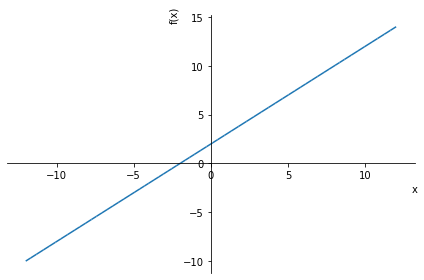

In [2]:
plot(f, (x,-12,12));

On first glance, it may appear the the next two functions are the same; however, it is important to remember that associated with any functional definition is the domain of the function.  Even though $g(x)=x^2$ and $h(x)=x^2$, the domains are different, thus they are really two different functions.  The function $g(x)$ defined on all real numbers is NOT a one-to-one function. 

A counter example would be $g(-2) = (-2)^2 = 4$ and $g(2) = 2^2 = 4$.  Given an output, $y=4$, we have two inputs from the domain, $x_1= -2$ and $x_2=2$ that get mapped to $y=4$.  Sketch the parabola $y=x^2$ from $x=-3$ to $x=3$ and verify that the horizontal line, $y=4$, intersects the graph at two points, $(-2, 4)$ and $(2, 4)$.  Thus the function $g(x)$ as defined is NOT a one-to-one function.



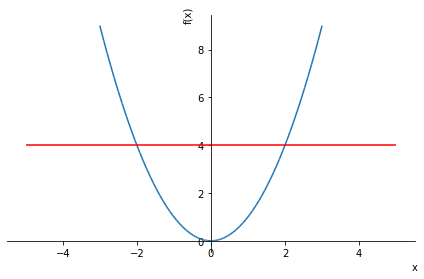

In [3]:
G_g.show();

However, if you restrict your domain to just $x \ge 0$, the "sketch" of the function will only be the right half of the parabola you sketched.  The horizontal line $y=4$ will only cross the graph in one place.  In fact, any horizontal line $y=k$ where $k>0$ will pass through the right half of parabola exactly once.  The third function is a one-to-one function.

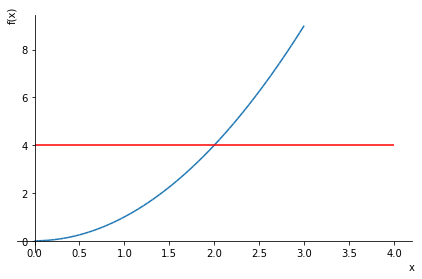

In [4]:
G_h.show();

### The consequence of a one-to-one determination: The existence of an inverse function!

If a function is one-to-one, then an inverse *function* exists.  For $f(x) = x + 2$ with domain $x \in (-\infty, \infty )$, we may write out the inverse function by writing $y = x + 2$ and solving for $x$, that is, $x = y-2$, which represents the inverse function, written $f^{-1}(y) = y-2$. Employing the forward function, $f(8) = 8+2 = 10$. Then, the inverse, $f^{-1}(10) = 10-2 = 8$, takes us back!

For the function $h(x) = x^2$ with domain $x \in [0, \infty)$, we can do a similar process to determine the inverse function.  We let $y = x^2$ and solve for $x$ to get $x = \sqrt{y}$ and $x = -\sqrt{y}$. However, since we restricted the domain of $h(x)$ to be $x \ge 0$, we need only consider the positive square root and $h^{-1}(y) = \sqrt{y}$.  

Notice of the second function from the Introduction, $g(x)$, since the domain was not resricted, the inverse process is not a "functional" process; for example, if $y=4$, going in reverse, there are two $x$-values associated with it, $x=-\sqrt{4}=-2$ and $x=\sqrt{4}=2$ (the horizontal line test).

In short, given $y = f(x)$, then $x = f^{-1}(y)$.  Also note that the domain of the forward function $f(x)$ is the range of the inverse function, and the range of $f(x)$ is the domain of the inverse function.

### A note on notation. 

Given $f(x) = x+2$, in lieu of writing $f^{-1}(y) = y-2$, since the variable $y$ represents the input and $y-2$ is the rule (what to do with the input), often the inverse is also written with the dummy variable $x$, that is, $f^{-1}(x) = x-2$.  However, the "$x$" in $f(x)$ and the "$x$" in $f^{-1}(x)$ represent two different quantities, most often with different units.  


### Explore the outputs of a basic exponential function

Consider the function $f(x) = 2^x$ defined on $(-\infty, \infty)$

## Exercise

In [2]:
%problem 1

### Problem 1

Compute the following values of $f(x) = 2^x$:

**(1)** &nbsp;&nbsp;$f(-2)$

**(2)** &nbsp;&nbsp;$f(-1)$

**(3)** &nbsp;&nbsp;$f(0)$

**(4)** &nbsp;&nbsp;$f(1)$

**(5)** &nbsp;&nbsp;$f(2)$

*Enter the answer(s) in the cell below.*

In [6]:
%%answer Problem 1
(1): 1/4
(2): 1/2
(3): 1
(4): 2
(5): 4

You entered: <br>&#9989; &nbsp;**(1)** &nbsp;$\displaystyle \frac{1}{4}$ &nbsp;&nbsp; (*Correct*) <br>&#9989; &nbsp;**(2)** &nbsp;$\displaystyle \frac{1}{2}$ &nbsp;&nbsp; (*Correct*) <br>&#9989; &nbsp;**(3)** &nbsp;$\displaystyle 1$ &nbsp;&nbsp; (*Correct*) <br>&#9989; &nbsp;**(4)** &nbsp;$\displaystyle 2$ &nbsp;&nbsp; (*Correct*) <br>&#9989; &nbsp;**(5)** &nbsp;$\displaystyle 4$ &nbsp;&nbsp; (*Correct*) <br>

## Exercise

Below is a plot of the function $f(x) = 2^x$. Use the horizontal line test to determine if the function is one-to-one.

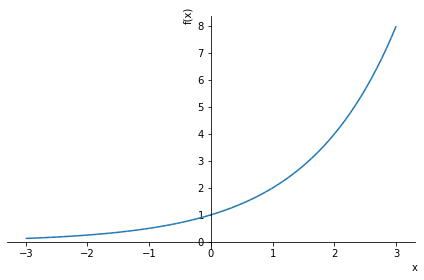

### Problem 2

**True or False?**

The function $f(x) = 2^x$ is one-to-one

*Enter `T` or `F` in the cell below.*

In [7]:
plot(f_exp(x), (x,-3,3));
%problem 2

In [9]:
%%answer Problem 2
T

&#9989; &nbsp; **Correct!**

Since the function $f(x) = 2^x$ is one-to-one, we know that a unique inverse function exists.  We can't just write $y = 2^x$ and "solve for $x$", we need new notation to depict this new function.

> If $f(x) = 2^x$, then $f^{-1}(y) = \log_2(y)$.

In the graph above, consider the horizontal line through $y=4$ on the vertical axis and a vertical line through $x=2$ on the horizontal axis and note that it intersects the curve at the point $(2, 4)$.  This may be interpreted as $2^2=4$ or as $\log_2(4) = 2$

Using this idea, confirm the following values of $\log_2(y)$: 

In [ ]:
%problem 3

### Problem 3

Compute the following values of $f(x) = \log_2(x)$:

**(1)** $\quad$$f(2)$

**(2)** $\quad$$f(1)$

**(3)** $\quad$$f(1/2)$

*Enter the answer(s) in the cell below.*

### Closing Considerations

>1. If $y  = b^x$, where wher the base $b>0$ and $b \neq 1$, then $x = \log_b (y)$; that is, given $y = f(x)$, then $x = f^{-1}(y)$.

>2. Note that the domain (valid input values) of $f(x) = 2^x$ is $(-\infty, \infty)$, but the range (outputs) of $f(x) = 2^x > 0$.  
This implies the domain of $f^{-1}(x) = \log_2(x)$ is $x>0$ (See the note on notation above).  
In general, the only valid input value into $\log_b(x)$ is a value $x>0$ (e.g. the domain of the function $\log_b(x)$ is $x>0$)

>3. Since $2^0 = 1$, and in general $b^0 = 1$, we have $\log_b(1) = 0$ regardless of base $b$.